In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# load data
data = pd.read_csv('hand_crafted_v3.csv')

In [3]:
data.head()

,item_id,prompt_id,mean_word,word_var,mean_sent,sent_var,ess_char_len,word_count,prep_comma,unique_word,...,WDT,DT,CD,NN,TO,JJ,VBP,RP,NNS,score
0,1,1,4.400593,5.842492,21.062500,171.308594,1483,337,71,117,...,0.000000,0.051546,0.000000,0.144330,0.025773,0.048969,0.030928,0.007732,0.043814,8.0
1,2,1,4.353222,5.469506,20.950000,142.247500,1824,419,70,125,...,0.002146,0.075107,0.008584,0.122318,0.017167,0.042918,0.036481,0.004292,0.087983,9.0
2,3,1,4.405018,5.545638,19.928571,184.637755,1229,279,41,113,...,0.000000,0.085714,0.006349,0.123810,0.025397,0.047619,0.076190,0.009524,0.111111,7.0
3,4,1,4.868321,6.415867,19.407407,135.722908,2551,524,77,179,...,0.003247,0.069805,0.000000,0.126623,0.024351,0.066558,0.040584,0.001623,0.086039,10.0
4,5,1,4.408602,5.450249,15.500000,43.516667,2050,465,56,128,...,0.005780,0.104046,0.009634,0.131021,0.040462,0.042389,0.036609,0.001927,0.078998,8.0


In [4]:
data.columns

Index(['item_id', 'prompt_id', 'mean_word', 'word_var', 'mean_sent',
       'sent_var', 'ess_char_len', 'word_count', 'prep_comma', 'unique_word',
       'clause_per_s', 'mean_clause_l', 'max_clause_in_s', 'spelling_err',
       'sent_ave_depth', 'ave_leaf_depth', 'automated_readability',
       'linsear_write', 'stop_prop', 'positive_sentence_prop',
       'negative_sentence_prop', 'neutral_sentence_prop',
       'overall_positivity_score', 'overall_negativity_score', ',', '.', 'VB',
       'JJR', 'WP', 'PRP$', 'VBN', 'VBG', 'IN', 'CC', 'JJS', 'PRP', 'MD',
       'WRB', 'RB', 'VBD', 'RBR', 'VBZ', 'NNP', 'POS', 'WDT', 'DT', 'CD', 'NN',
       'TO', 'JJ', 'VBP', 'RP', 'NNS', 'score'],
      dtype='object')

In [5]:
len(data.columns)

54

In [6]:
data.isna().sum()

item_id                     0
prompt_id                   0
mean_word                   0
word_var                    0
mean_sent                   0
sent_var                    0
ess_char_len                0
word_count                  0
prep_comma                  0
unique_word                 0
clause_per_s                0
mean_clause_l               0
max_clause_in_s             0
spelling_err                0
sent_ave_depth              0
ave_leaf_depth              0
automated_readability       0
linsear_write               0
stop_prop                   0
positive_sentence_prop      0
negative_sentence_prop      0
neutral_sentence_prop       0
overall_positivity_score    0
overall_negativity_score    0
,                           0
.                           0
VB                          0
JJR                         0
WP                          0
PRP$                        0
VBN                         0
VBG                         0
IN                          0
CC        

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['score', 'item_id', 'prompt_id'], axis=1)
y = data[['score', 'item_id', 'prompt_id']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# shape
X_train.shape, X_test.shape


((10382, 51), (2596, 51))

In [9]:
# shape 
y_train.shape, y_test.shape

((10382, 3), (2596, 3))

In [10]:
# Apply SVD

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=51)
# Fit the SVD to the data
svd.fit(X_train)
# Transform the data using the SVD fit above
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)

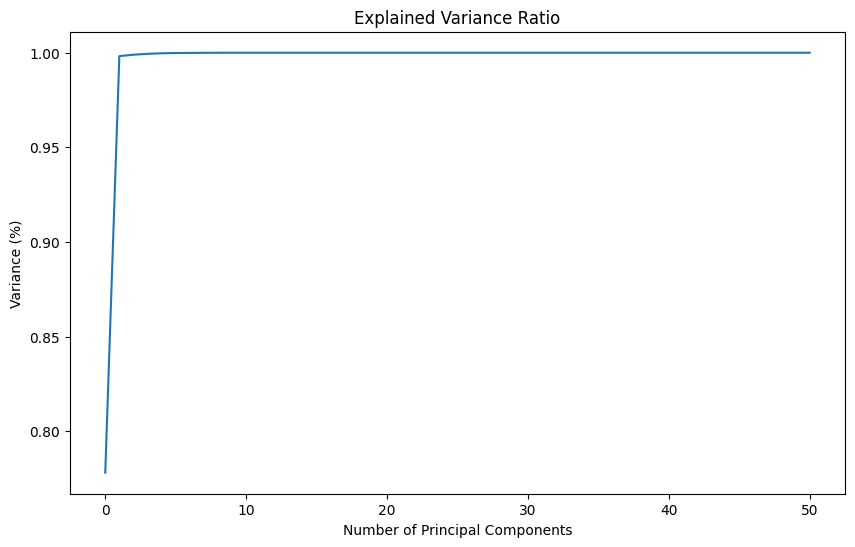

In [11]:
# Visualize all the features
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance Ratio')
plt.show()


In [12]:
# print variance for each component
explained_variance = svd.explained_variance_ratio_
explained_variance


array([7.78132169e-01, 2.20075709e-01, 7.43403855e-04, 4.67052561e-04,
       2.95983735e-04, 1.23098606e-04, 7.01647606e-05, 4.43109442e-05,
       2.38203136e-05, 1.57756242e-05, 6.02525075e-06, 1.00094584e-06,
       5.95767346e-07, 3.44280478e-07, 2.51016065e-07, 9.98358713e-08,
       6.81160442e-08, 5.70063243e-08, 4.80726988e-08, 4.46632383e-09,
       2.77536793e-09, 2.75347956e-09, 1.97684212e-09, 1.73661892e-09,
       1.28889675e-09, 8.88409717e-10, 8.41849589e-10, 6.80566134e-10,
       5.66811061e-10, 5.60065115e-10, 4.95979391e-10, 4.19705860e-10,
       3.16671010e-10, 2.77151465e-10, 2.72235225e-10, 2.39552574e-10,
       2.12387872e-10, 1.80137126e-10, 1.53521666e-10, 1.27750024e-10,
       1.10770928e-10, 6.69786331e-11, 5.54834295e-11, 4.59345238e-11,
       3.89097661e-11, 3.80232561e-11, 3.40735547e-11, 2.73336877e-11,
       2.08863573e-11, 1.54629696e-11, 1.22897692e-11])

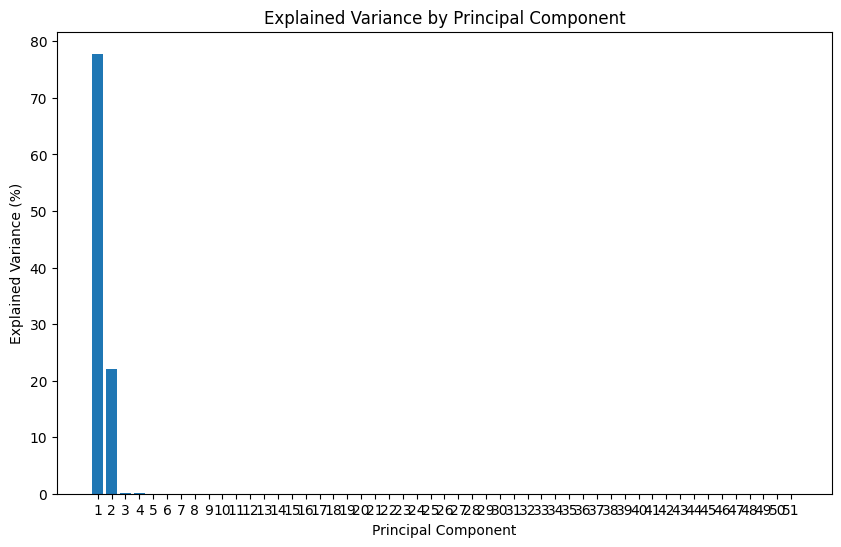

In [13]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [14]:
# Apply SVD

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6)
# Fit the SVD to the data
svd.fit(X_train)
# Transform the data using the SVD fit above
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)

In [15]:
# print variance for each component
explained_variance = svd.explained_variance_ratio_
explained_variance



array([7.78132169e-01, 2.20075709e-01, 7.43403855e-04, 4.67052561e-04,
       2.95983735e-04, 1.23098606e-04])

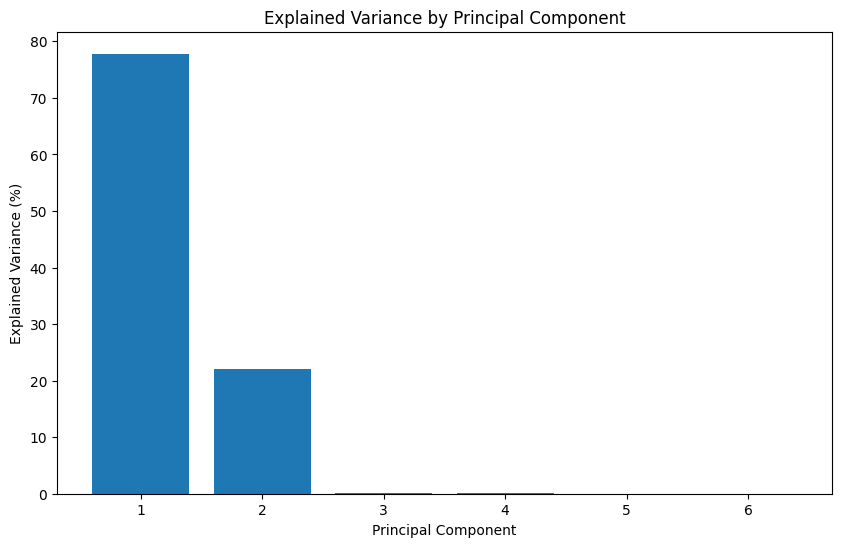

In [16]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [18]:
# Save pca model
import pickle

# save the model to disk
filename = 'linguistic_svd_model.sav'
pickle.dump(svd, open(filename, 'wb'))

# load the model from disk
loaded_svd = pickle.load(open(filename,'rb'))


In [19]:
print(X_train.shape)  # Shape of the current X_train
print(loaded_svd.components_.shape)  # Shape of PCA components

(10382, 51)
(6, 51)


In [20]:
loaded_svd.transform(X_train)

array([[ 5.29859518e+02, -2.14273845e+01,  1.62557297e+01,
         5.89972136e+00,  8.19747475e+00,  3.43295761e+00],
       [ 6.86193304e+02, -2.48772028e+01,  1.36963408e+01,
         6.73655355e+00, -1.08535296e+00, -3.88467774e-01],
       [ 1.93507562e+03, -1.23275366e+02, -4.95481817e+01,
        -8.69314946e+00,  2.94926538e+01, -6.21065445e-01],
       ...,
       [ 4.10272209e+02, -2.82695766e+01,  2.53822276e+01,
         6.15206594e+00, -2.51955915e+00, -5.51404377e+00],
       [ 2.96391487e+03, -5.71553987e+01,  1.06986259e+01,
        -3.60027928e+00, -3.53762393e+01,  3.69385148e+01],
       [ 7.07566586e+02,  4.42649823e+01,  9.94756236e+00,
        -7.75221610e-01,  7.79871128e+00, -3.56687606e-01]])

In [22]:
# GET PCA DATA

# Create a DataFrame with the principal components

X_train_svd = pd.DataFrame(data=X_train_svd)
X_test_svd = pd.DataFrame(data=X_test_svd)


In [23]:
# Ensure indices align
X_train_svd = X_train_svd.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test_svd = X_test_svd.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Now concatenate the dataframes
X_train_svd = pd.concat([X_train_svd, y_train], axis=1)
X_test_svd = pd.concat([X_test_svd, y_test], axis=1)



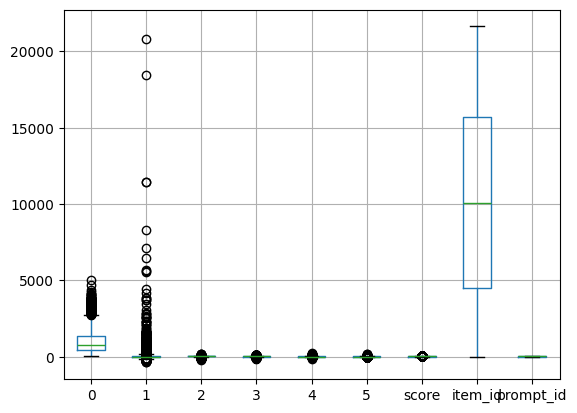

In [24]:
# Draw box plot

X_train_svd.boxplot()
plt.show()

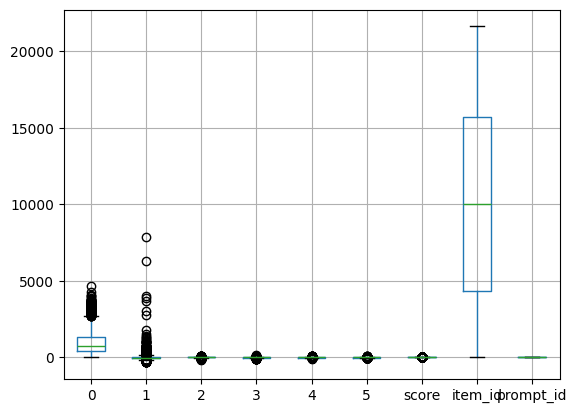

In [25]:
# Draw box plot

X_test_svd.boxplot()
plt.show()

In [26]:
X_test_svd.head()

,0,1,2,3,4,5,score,item_id,prompt_id
0,211.547264,72.968474,23.457284,2.052160,12.166566,0.246539,1.0,7398,3
1,120.368782,-9.637048,27.951034,7.518992,18.019537,0.854975,1.0,9876,4
2,393.018624,-28.733645,14.918858,-3.743095,1.479625,-5.100837,2.0,7004,3
3,466.372635,113.320817,36.023830,-2.735630,0.348535,-3.265488,2.0,6790,3
4,789.467314,-30.637109,9.625742,5.446452,3.822886,-0.529539,3.0,4599,2


In [27]:
X_train_svd.head()

,0,1,2,3,4,5,score,item_id,prompt_id
0,529.859518,-21.427385,16.255730,5.899721,8.197475,3.432958,2.0,12280,5
1,686.193304,-24.877203,13.696341,6.736554,-1.085353,-0.388468,3.0,4216,2
2,1935.075618,-123.275366,-49.548182,-8.693149,29.492654,-0.621065,4.0,3567,2
3,236.148666,-7.622097,9.317111,8.967288,0.536322,0.247745,1.0,10476,4
4,331.384761,154.850668,24.926037,2.634889,14.315751,-0.412912,2.0,12599,5


In [28]:
# attach both now and set index to item_id

X_train_svd = X_train_svd.set_index('item_id')
X_test_svd = X_test_svd.set_index('item_id')


In [29]:
X_train_svd.head()


,0,1,2,3,4,5,score,prompt_id
item_id,,,,,,,,
12280,529.859518,-21.427385,16.255730,5.899721,8.197475,3.432958,2.0,5
4216,686.193304,-24.877203,13.696341,6.736554,-1.085353,-0.388468,3.0,2
3567,1935.075618,-123.275366,-49.548182,-8.693149,29.492654,-0.621065,4.0,2
10476,236.148666,-7.622097,9.317111,8.967288,0.536322,0.247745,1.0,4
12599,331.384761,154.850668,24.926037,2.634889,14.315751,-0.412912,2.0,5


In [30]:
# Merge the train and test data (you can choose to concatenate them along rows)
merged_data = pd.concat([X_train_svd, X_test_svd])

# Sort by 'item_id'
merged_data = merged_data.sort_index()

merged_data.head()

,0,1,2,3,4,5,score,prompt_id
item_id,,,,,,,,
1,1536.308381,40.429798,11.443907,-7.558067,-5.431184,-3.839683,8.0,1
2,1882.758584,-18.543852,-4.055831,-5.369599,-0.589427,3.354042,9.0,1
3,1277.162024,76.091777,23.125677,-5.746770,-10.932136,-10.974046,7.0,1
4,2613.786531,-88.080349,5.471109,-65.831205,-6.007554,45.940189,10.0,1
5,2102.808604,-136.743704,-17.991692,-12.448115,3.373642,0.614701,8.0,1


In [31]:
# save

merged_data.to_csv('svd_1.csv', index=True)


In [32]:
readability = pd.read_csv('readability_data.csv')
readability.head()

,Essay_ID,Kincaid_Grade_Level,ARI,Coleman_Liau_Index,Flesch_Reading_Ease,Gunning_Fog_Index,LIX,SMOG_Index,RIX,Dale_Chall_Index,...,Total_Conjunctions,Total_Pronouns,Total_Prepositions,Total_Nominalizations,Total_Pronoun_Starters,Total_Interrogative_Starters,Total_Article_Starters,Total_Subordinate_Starters,Total_Conjunction_Starters,Total_Preposition_Starters
0,1.0,0.473611,0.512424,0.417457,0.567478,0.396054,0.514018,0.549841,0.407643,0.245001,...,0.318182,0.391304,0.470085,0.073171,0.08,0.285714,0.000000,0.333333,0.0,0.000000
1,2.0,0.582582,0.552950,0.441778,0.435069,0.554975,0.598785,0.698836,0.497725,0.368179,...,0.409091,0.452174,0.487179,0.219512,0.16,0.142857,0.181818,0.111111,0.0,0.000000
2,3.0,0.445281,0.470945,0.424657,0.567183,0.456524,0.497662,0.636807,0.393312,0.380837,...,0.363636,0.200000,0.299145,0.024390,0.04,0.142857,0.090909,0.111111,0.1,0.083333
3,4.0,0.562133,0.665803,0.703988,0.427117,0.566170,0.717465,0.723364,0.620564,0.552666,...,0.386364,0.313043,0.487179,0.390244,0.04,0.285714,0.363636,0.222222,0.0,0.250000
4,5.0,0.443214,0.410476,0.421405,0.516206,0.421611,0.437963,0.625058,0.333121,0.201825,...,0.340909,0.313043,0.487179,0.268293,0.28,0.000000,0.636364,0.444444,0.0,0.333333


In [33]:
readability.columns

Index(['Essay_ID', 'Kincaid_Grade_Level', 'ARI', 'Coleman_Liau_Index',
       'Flesch_Reading_Ease', 'Gunning_Fog_Index', 'LIX', 'SMOG_Index', 'RIX',
       'Dale_Chall_Index', 'Avg_Characters_per_Word', 'Avg_Syllables_per_Word',
       'Avg_Words_per_Sentence', 'Sentences_per_Paragraph', 'Type_Token_Ratio',
       'Total_Characters', 'Total_Syllables', 'Total_Words',
       'Unique_Word_Types', 'Total_Sentences', 'Total_Paragraphs',
       'Total_Long_Words', 'Total_Complex_Words', 'Total_Complex_Words_DC',
       'Total_ToBe_Verbs', 'Total_Auxiliary_Verbs', 'Total_Conjunctions',
       'Total_Pronouns', 'Total_Prepositions', 'Total_Nominalizations',
       'Total_Pronoun_Starters', 'Total_Interrogative_Starters',
       'Total_Article_Starters', 'Total_Subordinate_Starters',
       'Total_Conjunction_Starters', 'Total_Preposition_Starters'],
      dtype='object')

In [34]:
X= readability.drop(['Essay_ID'], axis=1)
Y = readability[['Essay_ID']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# shape
X_train.shape, X_test.shape


((10382, 35), (2596, 35))

In [36]:
y_train.shape, y_test.shape

((10382, 1), (2596, 1))

In [37]:
# Apply SVD

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=35)
# Fit the SVD to the data
svd.fit(X_train)
# Transform the data using the SVD fit above
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)


# print variance for each component
explained_variance = svd.explained_variance_ratio_

In [38]:
explained_variance

array([1.98214507e-01, 3.14190975e-01, 9.70719858e-02, 6.84785305e-02,
       3.57365991e-02, 3.23886957e-02, 2.87275980e-02, 2.61084755e-02,
       2.35067150e-02, 2.25193173e-02, 1.95068805e-02, 1.73989459e-02,
       1.49606204e-02, 1.30569961e-02, 1.18112171e-02, 1.07575497e-02,
       1.03946645e-02, 9.76265836e-03, 8.65515112e-03, 7.39024747e-03,
       7.25895666e-03, 5.05568755e-03, 4.25047922e-03, 3.43620979e-03,
       2.55857255e-03, 1.69768909e-03, 1.55802654e-03, 1.05360344e-03,
       8.56312199e-04, 5.88765340e-04, 3.99164306e-04, 3.43103129e-04,
       1.54408051e-04, 1.16272379e-04, 3.44199309e-05])

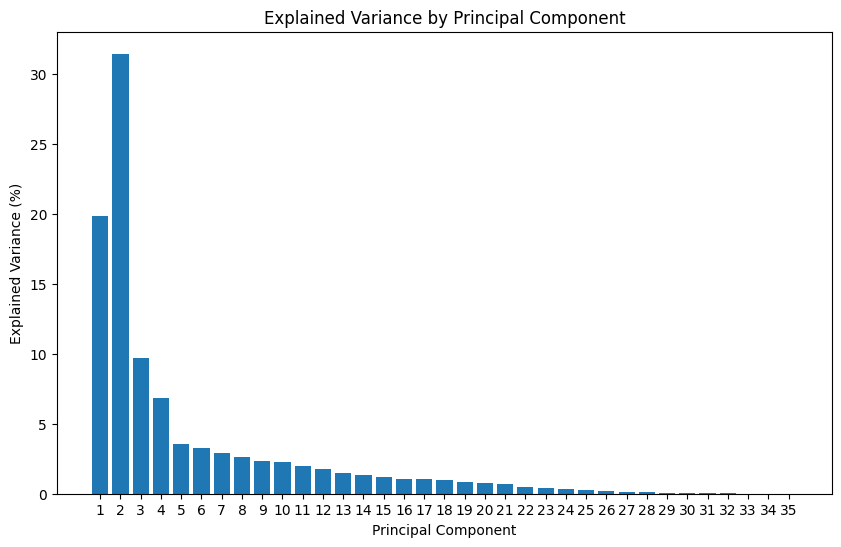

In [39]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


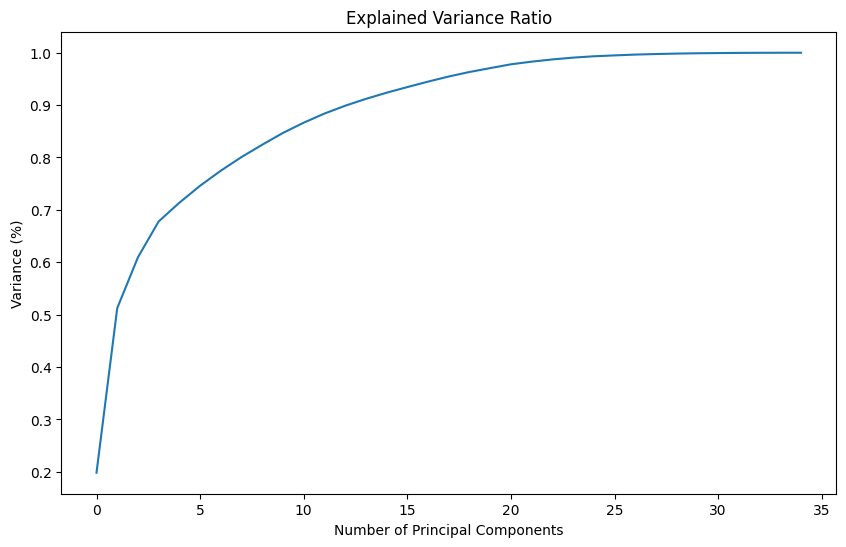

In [40]:
# Visualize all the features
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance Ratio')
plt.show()


In [41]:
# Apply SVD

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=32)
# Fit the SVD to the data
svd.fit(X_train)
# Transform the data using the SVD fit above
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)


# print variance for each component
explained_variance = svd.explained_variance_ratio_

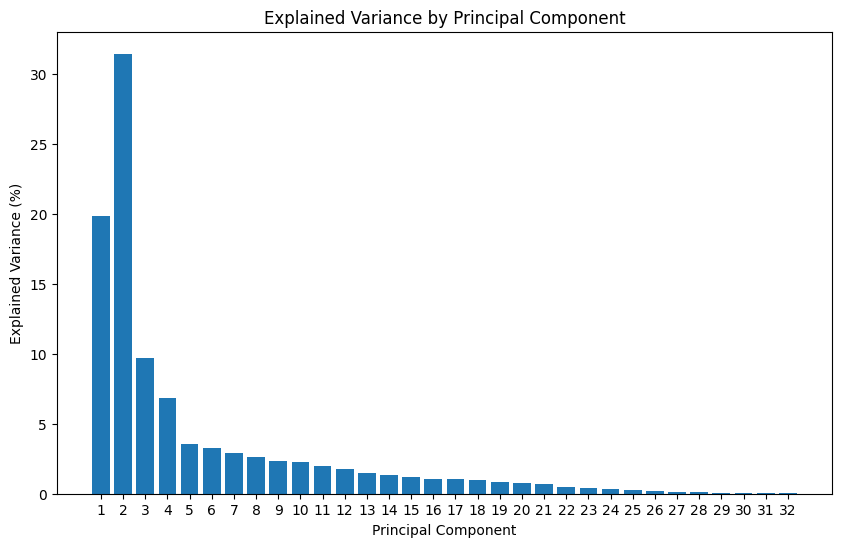

In [42]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


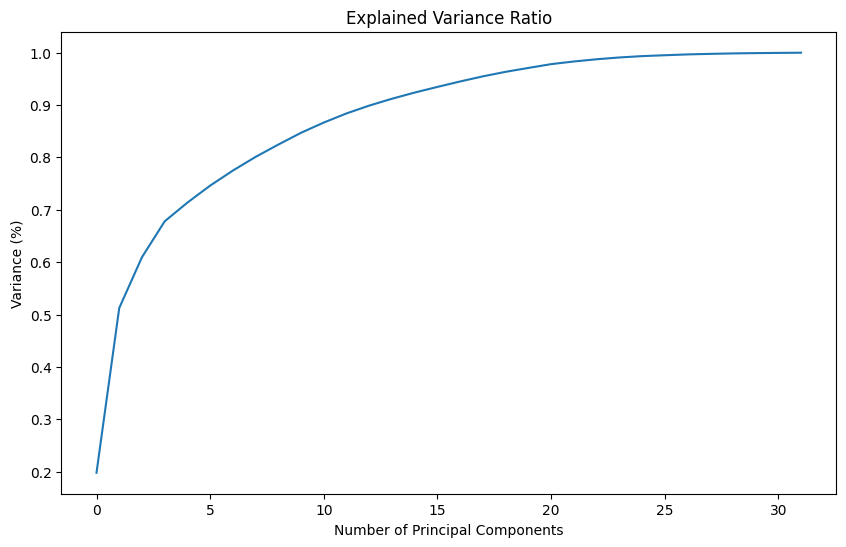

In [43]:
# Visualize all the features
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance Ratio')
plt.show()


In [44]:
# Save pca model
import pickle

# save the model to disk
filename = 'readability_pca_model.sav'
pickle.dump(svd, open(filename, 'wb'))

# load the model from disk
loaded_pca = pickle.load(open(filename,'rb'))


In [45]:
loaded_pca.transform(X_train)

array([[ 1.72022578e+00,  1.56385839e-01,  1.98363039e-01, ...,
         1.22874890e-03,  1.23038773e-02, -3.95647180e-03],
       [ 1.58388599e+00,  5.29013094e-01,  1.90071236e-02, ...,
        -2.21112314e-02, -2.08443769e-02, -4.39069018e-03],
       [ 2.09451382e+00, -1.35942010e-01, -1.13947999e-01, ...,
         1.40905958e-02,  9.02364780e-03, -1.58378814e-03],
       ...,
       [ 1.98507324e+00,  3.70236116e-01,  1.02163644e-01, ...,
        -1.92084984e-03,  7.67593005e-03,  2.87642319e-03],
       [ 2.64033132e+00, -1.07282987e+00, -2.17704470e-01, ...,
        -6.05178149e-04,  1.40949602e-02,  1.79515012e-02],
       [ 2.11232500e+00, -3.42251305e-02,  8.50296142e-02, ...,
        -8.53503782e-03, -1.05622721e-02, -1.61061369e-03]])

In [47]:
X_train_svd = pd.DataFrame(data=X_train_svd)
X_test_svd = pd.DataFrame(data=X_test_svd)


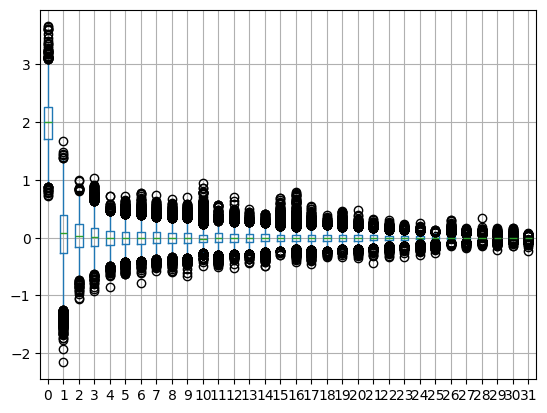

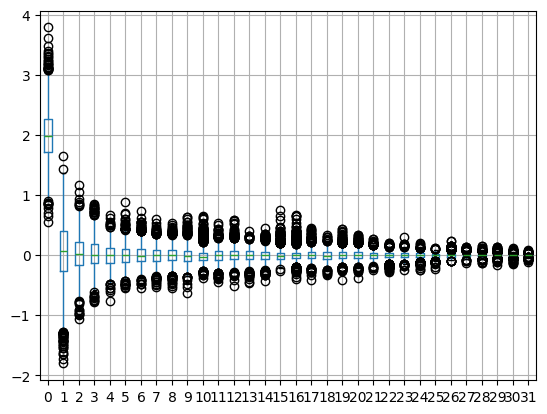

In [48]:
# Draw box plot excluding Essay_ID

X_train_svd.boxplot()
plt.show()

# Draw box plot excluding Essay_ID

X_test_svd.boxplot()
plt.show()

In [49]:
X_train_svd

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.720226,0.156386,0.198363,0.075083,0.100108,0.117579,0.271189,-0.057975,0.314116,0.183918,...,-0.044026,-0.034737,0.001634,0.023463,-0.005053,0.000634,0.020944,0.001229,0.012304,-0.003956
1,1.583886,0.529013,0.019007,0.031001,-0.331977,0.078807,0.021942,-0.044898,-0.049747,-0.100908,...,-0.023438,-0.038082,0.008742,-0.045302,0.002594,-0.020576,-0.000360,-0.022111,-0.020844,-0.004391
2,2.094514,-0.135942,-0.113948,-0.122083,-0.144304,-0.121636,0.060986,-0.189727,0.071052,0.133405,...,-0.055926,-0.105399,0.038255,-0.083519,0.025639,-0.008999,-0.009698,0.014091,0.009024,-0.001584
3,1.519177,0.180204,0.482067,0.117412,-0.073641,-0.035597,0.298130,-0.307769,0.128989,-0.014164,...,-0.013500,0.039580,-0.020092,-0.067375,-0.036711,-0.056398,-0.037772,0.003527,-0.005834,0.009471
4,1.904670,0.695204,-0.030914,0.093931,0.125071,0.038734,0.051491,0.016893,0.092258,0.043381,...,0.041278,0.029504,-0.058389,0.016461,-0.001675,0.010607,0.003142,0.005152,0.002213,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10377,1.390486,0.288292,0.251870,0.466379,0.073180,0.183750,0.003764,0.166256,0.104182,0.097598,...,0.022730,0.018905,-0.003933,0.000435,0.006986,-0.018995,-0.015821,-0.012224,-0.000181,-0.005751
10378,2.608855,-0.294598,-0.144506,-0.304274,0.102047,0.243515,0.029948,-0.062447,-0.135281,-0.074179,...,0.093515,-0.014935,-0.064613,0.042344,0.016549,-0.019990,0.002876,0.031472,0.011979,0.005367
10379,1.985073,0.370236,0.102164,-0.080322,-0.171105,-0.123342,-0.092998,-0.112849,0.063921,0.207780,...,-0.032698,0.059605,-0.043822,0.012792,-0.063597,-0.047605,-0.019748,-0.001921,0.007676,0.002876
10380,2.640331,-1.072830,-0.217704,0.195182,0.041364,0.079377,-0.044535,0.009540,0.219163,0.073536,...,0.095434,-0.078050,0.018325,0.003246,0.008055,-0.026043,0.029665,-0.000605,0.014095,0.017952


In [50]:
# Ensure indices align
X_train_svd = X_train_svd.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test_svd = X_test_svd.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Now concatenate the dataframes
X_train_svd = pd.concat([X_train_svd, y_train], axis=1)
X_test_svd = pd.concat([X_test_svd, y_test], axis=1)



In [51]:
X_train_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Essay_ID
0,1.720226,0.156386,0.198363,0.075083,0.100108,0.117579,0.271189,-0.057975,0.314116,0.183918,...,-0.034737,0.001634,0.023463,-0.005053,0.000634,0.020944,0.001229,0.012304,-0.003956,12280.0
1,1.583886,0.529013,0.019007,0.031001,-0.331977,0.078807,0.021942,-0.044898,-0.049747,-0.100908,...,-0.038082,0.008742,-0.045302,0.002594,-0.020576,-0.000360,-0.022111,-0.020844,-0.004391,4216.0
2,2.094514,-0.135942,-0.113948,-0.122083,-0.144304,-0.121636,0.060986,-0.189727,0.071052,0.133405,...,-0.105399,0.038255,-0.083519,0.025639,-0.008999,-0.009698,0.014091,0.009024,-0.001584,3567.0
3,1.519177,0.180204,0.482067,0.117412,-0.073641,-0.035597,0.298130,-0.307769,0.128989,-0.014164,...,0.039580,-0.020092,-0.067375,-0.036711,-0.056398,-0.037772,0.003527,-0.005834,0.009471,10476.0
4,1.904670,0.695204,-0.030914,0.093931,0.125071,0.038734,0.051491,0.016893,0.092258,0.043381,...,0.029504,-0.058389,0.016461,-0.001675,0.010607,0.003142,0.005152,0.002213,0.000683,12599.0


In [52]:
# attach both now and set index to Essay_ID

X_train_svd = X_train_svd.set_index('Essay_ID')
X_test_svd = X_test_svd.set_index('Essay_ID')


In [53]:
X_train_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Essay_ID,,,,,,,,,,,,,,,,,,,,,
12280.0,1.720226,0.156386,0.198363,0.075083,0.100108,0.117579,0.271189,-0.057975,0.314116,0.183918,...,-0.044026,-0.034737,0.001634,0.023463,-0.005053,0.000634,0.020944,0.001229,0.012304,-0.003956
4216.0,1.583886,0.529013,0.019007,0.031001,-0.331977,0.078807,0.021942,-0.044898,-0.049747,-0.100908,...,-0.023438,-0.038082,0.008742,-0.045302,0.002594,-0.020576,-0.000360,-0.022111,-0.020844,-0.004391
3567.0,2.094514,-0.135942,-0.113948,-0.122083,-0.144304,-0.121636,0.060986,-0.189727,0.071052,0.133405,...,-0.055926,-0.105399,0.038255,-0.083519,0.025639,-0.008999,-0.009698,0.014091,0.009024,-0.001584
10476.0,1.519177,0.180204,0.482067,0.117412,-0.073641,-0.035597,0.298130,-0.307769,0.128989,-0.014164,...,-0.013500,0.039580,-0.020092,-0.067375,-0.036711,-0.056398,-0.037772,0.003527,-0.005834,0.009471
12599.0,1.904670,0.695204,-0.030914,0.093931,0.125071,0.038734,0.051491,0.016893,0.092258,0.043381,...,0.041278,0.029504,-0.058389,0.016461,-0.001675,0.010607,0.003142,0.005152,0.002213,0.000683


In [54]:
# Merge the train and test data (you can choose to concatenate them along rows)
merged_data = pd.concat([X_train_svd, X_test_svd])

# Sort by 'item_id'
merged_data = merged_data.sort_index()

merged_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Essay_ID,,,,,,,,,,,,,,,,,,,,,
1.0,1.966583,-0.244302,-0.185411,0.409279,-0.119374,0.110140,-0.163682,0.147077,-0.121936,-0.035476,...,0.107382,0.059521,-0.035532,0.024348,0.031709,-0.035186,-0.021501,-0.008846,-0.001849,0.017713
2.0,2.375505,-0.342532,-0.376770,0.199877,-0.088280,-0.109991,-0.193683,-0.016209,0.209135,0.193214,...,0.058980,0.060766,-0.003026,-0.019450,-0.014306,-0.013055,0.015029,0.002754,-0.007088,0.007375
3.0,1.922156,-0.024795,-0.103012,0.320955,0.006559,0.100242,-0.166560,0.097676,0.131371,-0.080002,...,0.078087,-0.005225,0.002133,0.014126,-0.011399,-0.035093,-0.000080,-0.006357,0.004396,0.007420
4.0,2.895155,-0.513048,-0.413919,-0.120567,0.094366,0.227183,-0.286663,0.215495,0.284680,0.234668,...,0.024110,-0.048298,0.086655,-0.031425,-0.014886,0.016180,0.014358,0.003900,0.007665,0.037003
5.0,2.346185,-0.785257,-0.147486,-0.082477,-0.389094,-0.115804,-0.011125,0.369535,0.408128,0.240886,...,0.017056,-0.033218,-0.004711,0.013688,-0.035604,0.007430,-0.005218,0.004976,0.016981,0.011027


In [55]:
# save

merged_data.to_csv('svd_readability.csv', index=True)


In [56]:
# Save merged_data to pickle file
import numpy as np
import pickle

# Convert the DataFrame to a NumPy array
array_data = merged_data.values

array_data


array([[ 1.96658312e+00, -2.44301595e-01, -1.85411153e-01, ...,
        -8.84581079e-03, -1.84889005e-03,  1.77130054e-02],
       [ 2.37550526e+00, -3.42532255e-01, -3.76770497e-01, ...,
         2.75360925e-03, -7.08810725e-03,  7.37505204e-03],
       [ 1.92215572e+00, -2.47945935e-02, -1.03011957e-01, ...,
        -6.35705893e-03,  4.39648951e-03,  7.41990558e-03],
       ...,
       [ 2.76019112e+00, -1.11979905e+00, -3.20916307e-01, ...,
        -1.04457078e-02, -4.30611587e-03,  2.55301317e-03],
       [ 2.14489046e+00, -8.00355382e-01,  6.88343173e-02, ...,
        -2.66760945e-02, -1.77575972e-02, -3.15695637e-02],
       [ 2.13068293e+00, -3.75816863e-01, -1.48835048e-01, ...,
         1.24552303e-02, -1.71684273e-02, -2.22677089e-02]])

In [57]:
# Save the array to a pickle file
with open('readability.pickle', 'wb') as f:
    pickle.dump(array_data, f)